In [ ]:
import numpy as np # linear algebra

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\GitHub\Lab2Analyze\Lab2Analyze\Dataset_Food'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Text(0.5, 1.0, 'Non food category image')

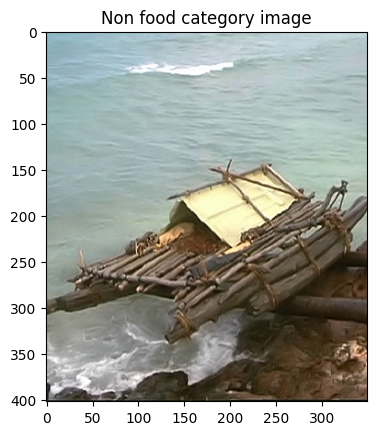

In [4]:
non_food = plt.imread('D:/GitHub/Lab2Analyze/Lab2Analyze/Dataset_Food/validation/non_food/433.jpg')
plt.imshow(non_food)
plt.title('Non food category image')

Text(0.5, 1.0, 'Food category image')

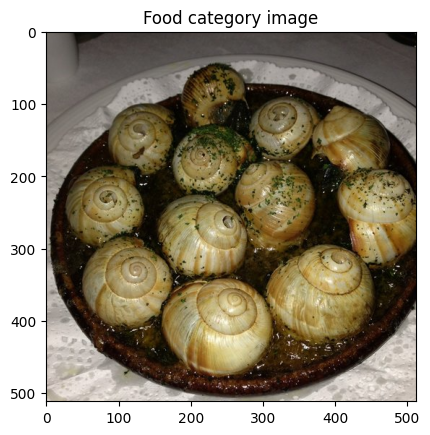

In [6]:
food = plt.imread('D:/GitHub/Lab2Analyze/Lab2Analyze/Dataset_Food/validation/food/270.jpg')
plt.imshow(food)
plt.title('Food category image')

In [7]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory='D:/GitHub/Lab2Analyze/Lab2Analyze/Dataset_Food/training',
                                                   target_size=(128,128),
                                                   classes=['food','non_food'],
                                                   class_mode='binary')

Found 3000 images belonging to 2 classes.


In [8]:
valid_datagen = ImageDataGenerator(
                    rescale = 1./255)

valid_generator = valid_datagen.flow_from_directory(directory='D:/GitHub/Lab2Analyze/Lab2Analyze/Dataset_Food/validation',
                                                   target_size=(128,128),
                                                   classes=['food','non_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(
                    rescale = 1./255)

test_generator = valid_datagen.flow_from_directory(directory='D:/GitHub/Lab2Analyze/Lab2Analyze/Dataset_Food/evaluation',
                                                   target_size=(128,128),
                                                   classes=['food','non_food'],
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,kernel_initializer='he_normal',kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128,kernel_initializer='he_normal',kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256,kernel_initializer='he_normal',kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [11]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
Y = model.fit_generator(train_generator, epochs=5,validation_data=valid_generator)

C:\Users\boss\AppData\Local\Temp\ipykernel_26676\2437016009.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Y = model.fit_generator(train_generator, epochs=5,validation_data=valid_generator)


Epoch 1/5
94/94 [==============================] - 136s 1s/step - loss: 1.5403 - accuracy: 0.6653 - val_loss: 0.4702 - val_accuracy: 0.8150
Epoch 2/5
94/94 [==============================] - 94s 999ms/step - loss: 0.4329 - accuracy: 0.8043 - val_loss: 0.3738 - val_accuracy: 0.8540
Epoch 3/5
94/94 [==============================] - 99s 1s/step - loss: 0.4094 - accuracy: 0.8220 - val_loss: 0.3473 - val_accuracy: 0.8660
Epoch 4/5
94/94 [==============================] - 101s 1s/step - loss: 0.3424 - accuracy: 0.8530 - val_loss: 0.3139 - val_accuracy: 0.8800
Epoch 5/5
94/94 [==============================] - 100s 1s/step - loss: 0.3447 - accuracy: 0.8487 - val_loss: 0.4014 - val_accuracy: 0.8040


In [15]:
model.evaluate_generator(test_generator,steps=len(test_generator))

C:\Users\boss\AppData\Local\Temp\ipykernel_26676\986485969.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,steps=len(test_generator))


[0.4438057541847229, 0.7979999780654907]